In [13]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.io import loadmat
from matplotlib import cm

In [14]:
data_path = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/QUINTO /MODELOS/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/Coactivation_matrix.mat"
mat = loadmat(data_path)
matrix = mat["Coactivation_matrix"] 

In [15]:
G = nx.from_numpy_array(matrix, create_using=nx.DiGraph)

In [17]:
for node in G.nodes():
    edges = G[node]
    if edges:
        t_neighbors = sorted(edges.items(), key=lambda x: x[1]['weight'], reverse=True)[:3]
        t_neighbors = [v[0] for v in t_neighbors] 
        for vec in list(edges.keys()):
            if vec not in t_neighbors:
                G.remove_edge(node, vec)


In [18]:
x, y, z = mat["Coord"][:, 0], mat["Coord"][:, 1], mat["Coord"][:, 2]

In [19]:
adj_matriz = nx.to_numpy_array(G)

In [20]:
PM = np.max(adj_matriz) if np.max(adj_matriz) > 0 else 1
PN = adj_matriz / PM
colormap = cm.viridis

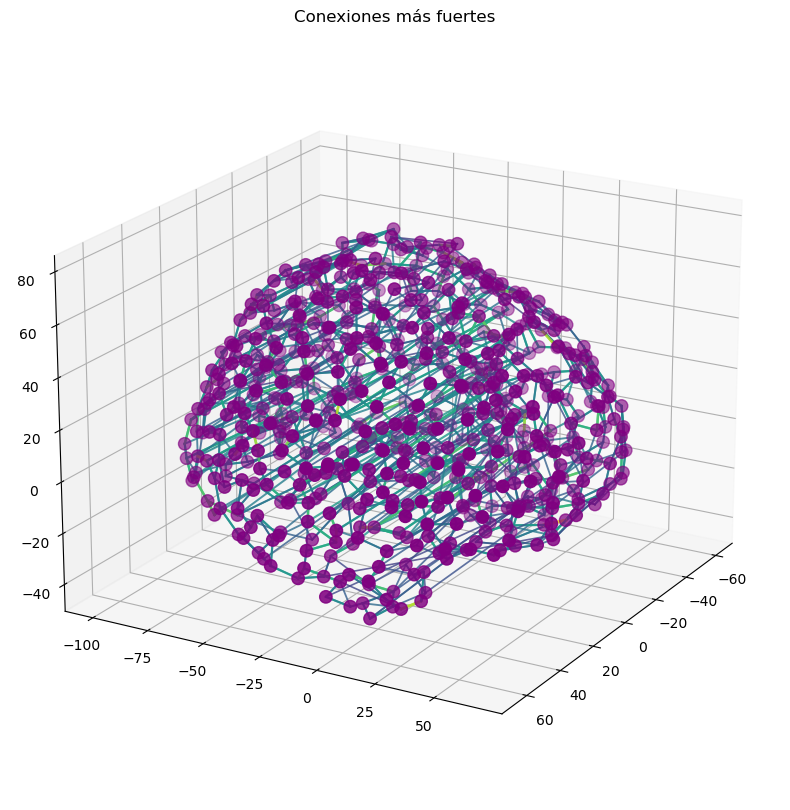

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(x, y, z, color="purple", s=80)
for i in range(len(adj_matriz)):
    for j in range(len(adj_matriz)):
        weight = adj_matriz[i, j]
        if weight > 0: 
            color = colormap(PN[i, j])
            ax.plot(
                [x[i], x[j]],
                [y[i], y[j]],
                [z[i], z[j]],
                color=color,
                alpha=0.8,
                lw=1 + 3 * weight, 
            )
ax.view_init(elev=20.0, azim=30)
plt.title("Conexiones más fuertes")
plt.show()

In [22]:
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

Número de nodos: 638
Número de aristas: 1914
